# **Final Project - Stage 1 (*Exploratory Data Analysis*)**

**Kelompok : SIGMA** <br>
**Anggota:**
- Achmad Gusti Wijaya
- Bintang Sirius
- Eggie Christyandi
- Handi Widiansyah
- Kevin Bagas Arifki Mawuntu
- Oknardo Budi Setiawan Tulung
- Pijar Hatinurani Merdeka

## *Import Library*

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


In [3]:
# Mengubah parameter default matplotlib

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

## *Import Dataset*

In [3]:
# load dataset
df = pd.read_csv('Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


<img src="data_overview_sigma.png" alt="Data Overview Sigma" width="400">


## **1. *Descriptive Statistics***

### a.  Info *Dataset*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dari hasil *code* diatas, dapat dilihat bahwa *dataset* tersebut berisikan total 12 kolom dan 10999 baris dengan tipe data nya yang telah sesuai.

### b. *Null and Duplicate Values*

In [6]:
# Null values
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
# Duplicate values
df.duplicated().any()

False

Didapatkan bahwa data tersebut sudah tidak memiliki data yang kosong maupun berduplikat.

### c. *Statistical summary*

In [5]:
# Mengelompokkan feature
num= ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cat = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']

In [6]:
# Summary feature numerical
df[num].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
# Summary feature categorical
df[cat].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [11]:
# Melihat jumlah value pada feature categorical

for col in cat:
    print(f'Total nilai unik pada {col} :')
    print(df[col].value_counts())
    print()
    print(f'Total persentase nilai unik pada {col} :')
    print(round(df[col].value_counts(normalize = True)*100,2))
    print()

Total nilai unik pada Warehouse_block :
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Total persentase nilai unik pada Warehouse_block :
Warehouse_block
F    33.33
D    16.67
A    16.67
B    16.67
C    16.67
Name: proportion, dtype: float64

Total nilai unik pada Mode_of_Shipment :
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Total persentase nilai unik pada Mode_of_Shipment :
Mode_of_Shipment
Ship      67.84
Flight    16.16
Road      16.00
Name: proportion, dtype: float64

Total nilai unik pada Product_importance :
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Total persentase nilai unik pada Product_importance :
Product_importance
low       48.16
medium    43.22
high       8.62
Name: proportion, dtype: float64

Total nilai unik pada Gender :
Gender
F    5545
M    5454
Name: count, dtype: int64

Total persentase nilai unik pada Gender :
Gender
F    50

Dari hasil *code* diatas, dapat disimpulkan sebagai berikut.
- Semua nilai *variable numeric* (*min/max*) masuk akal.
- Terdapat perbedaan yang cukup jauh antara nilai *mean* dan *median* pada *feature* `Prior_purchases`, `Discount_offered`, dimana nilai *mean* lebih besar dari nilai *median*nya.
- Nilai *mean* dari `Weight_in_gms` lebih kecil dibandingkan dengan nilai *median*nya.

## **2. *Univariate Analysis***

### a. *Numericals*

In [15]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Deteksi outlier berdasarkan IQR
outliers_count = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_count[col] = sum(outlier_indices)

# Jumlah outlier
for col in num_cols:
    count = len(df[col])
    print(f"Column '{col}':")
    print(f"  Total values: {count}")
    if col in outliers_count:
        outlier_count = outliers_count[col]
        print(f"  Outliers: {outlier_count}")


Column 'ID':
  Total values: 10999
  Outliers: 0
Column 'Customer_care_calls':
  Total values: 10999
  Outliers: 0
Column 'Customer_rating':
  Total values: 10999
  Outliers: 0
Column 'Cost_of_the_Product':
  Total values: 10999
  Outliers: 0
Column 'Prior_purchases':
  Total values: 10999
  Outliers: 1003
Column 'Discount_offered':
  Total values: 10999
  Outliers: 2209
Column 'Weight_in_gms':
  Total values: 10999
  Outliers: 0
Column 'Reached.on.Time_Y.N':
  Total values: 10999
  Outliers: 0


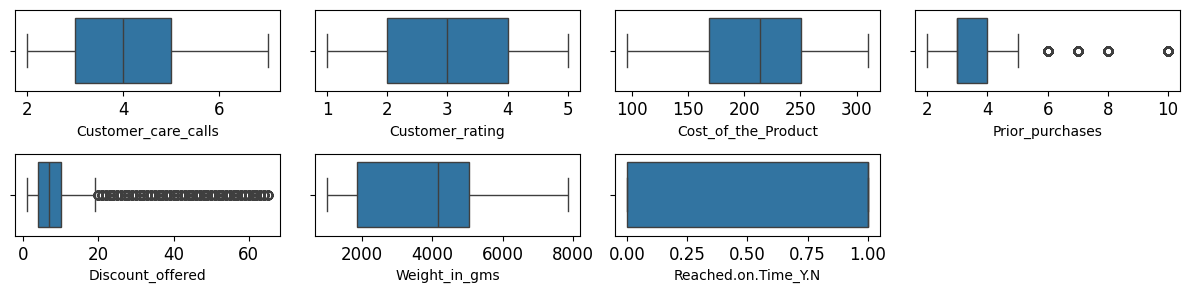

In [12]:
# boxplot feature numerical

for i in range(0, len(num)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[num[i]])
    plt.tight_layout()

Terlihat bahwa *feature* `Prior_purchases` dan `Discount_offered` memiliki *outlier*.

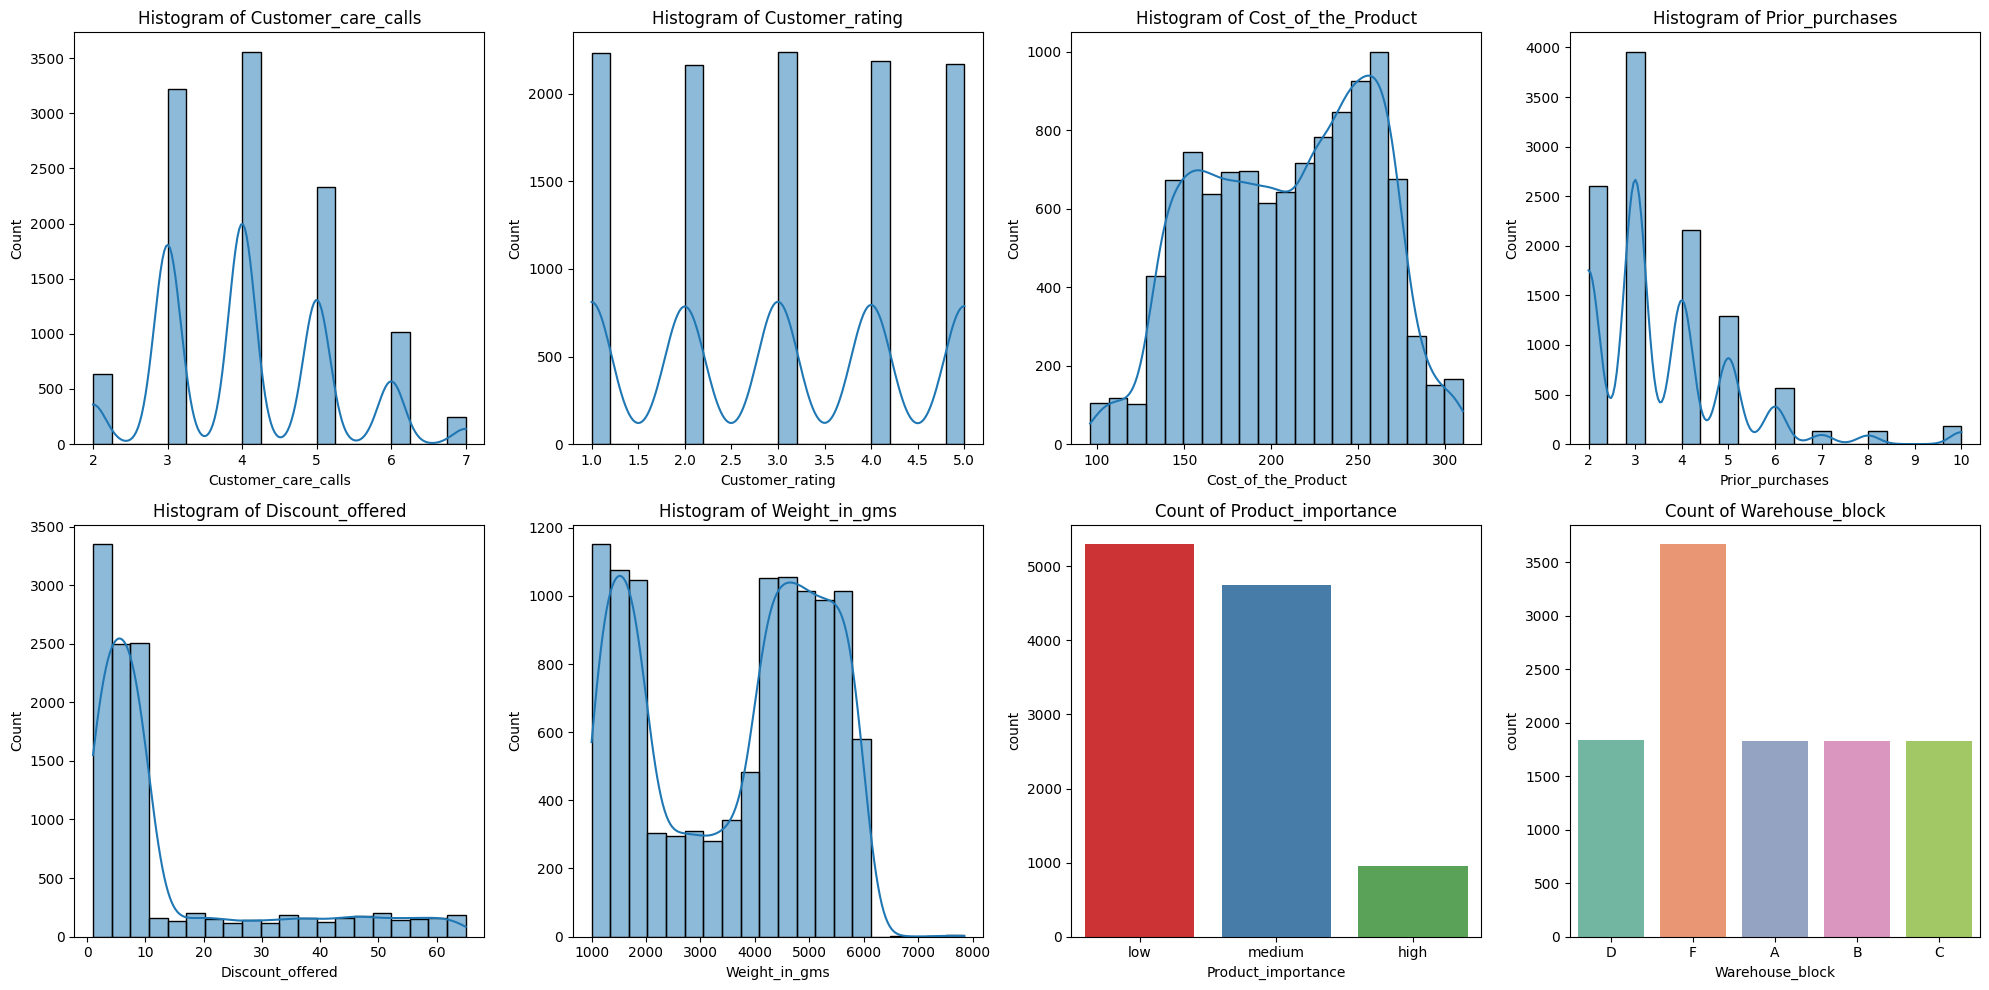

In [10]:
plt.figure(figsize=(20, 10))
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    
# Product_importance
plt.subplot(2, 4, 7)
sns.countplot(x='Product_importance', data=df, palette='Set1')
plt.title('Count of Product_importance')

# Warehouse_block
plt.subplot(2, 4, 8)
sns.countplot(x='Warehouse_block', data=df, palette='Set2')
plt.title('Count of Warehouse_block')

plt.tight_layout()
plt.show()


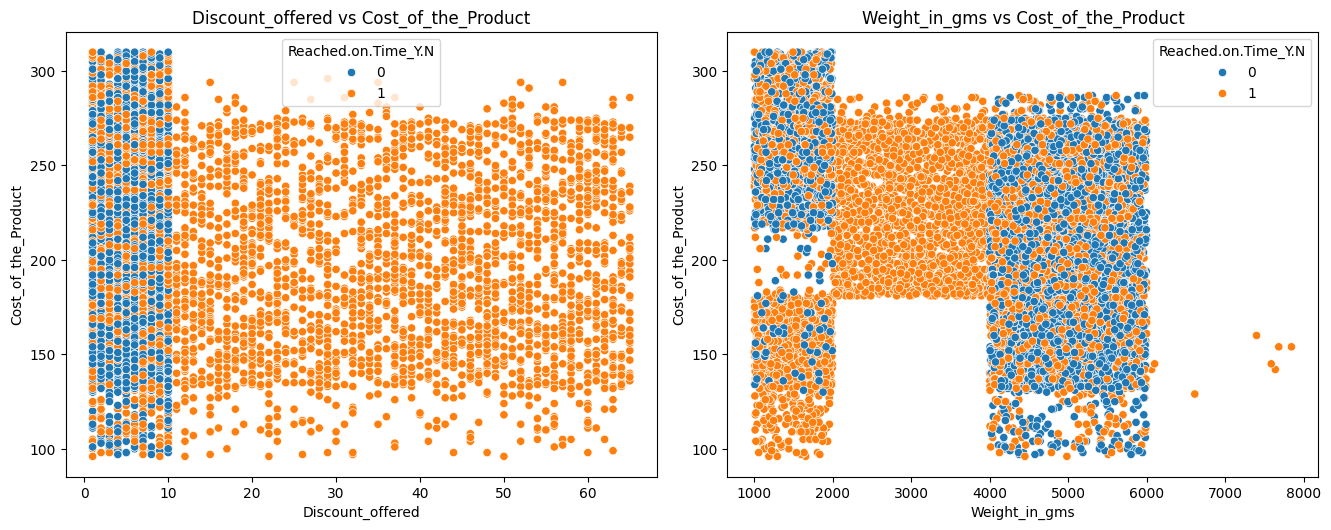

In [9]:
plt.figure(figsize=(20, 10))

# Scatter plot Discount_offered vs Cost_of_the_Product
plt.subplot(2, 3, 4)
sns.scatterplot(x='Discount_offered', y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', data=df)
plt.title('Discount_offered vs Cost_of_the_Product')

# Scatter plot Weight_in_gms vs Cost_of_the_Product
plt.subplot(2, 3, 5)
sns.scatterplot(x='Weight_in_gms', y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', data=df)
plt.title('Weight_in_gms vs Cost_of_the_Product')

plt.tight_layout()
plt.show()


Dari plot grafik diatas, dapat terlihat bahwa:
- `Customer_care_calls` dan `Prior_purchases` memiliki sebaran yang mirip (cenderung *right-skewed*).
- `Customer_rating` memiliki sebaran yang unik, dimana tiap nilai *rating* memiliki nilai yang hampir sama.
- `Cost_of_the_Product` hampir mendekati distribusi normal (cenderung *left-skewed*).
- `Discount_offered` memiliki sebaran *right-skewed*.
- `Weight_in_gms` memiliki sebaran bimodal, dengan distribusi data terpusat pada 2 bagian.
- `Reached.on.Time_Y.N` dengan nilai 1 (pengiriman barang tidak tepat waktu) lebih mendominasi jumlahnya dibandingkan dengan nilai 0 (pengiriman barang tepat waktu).

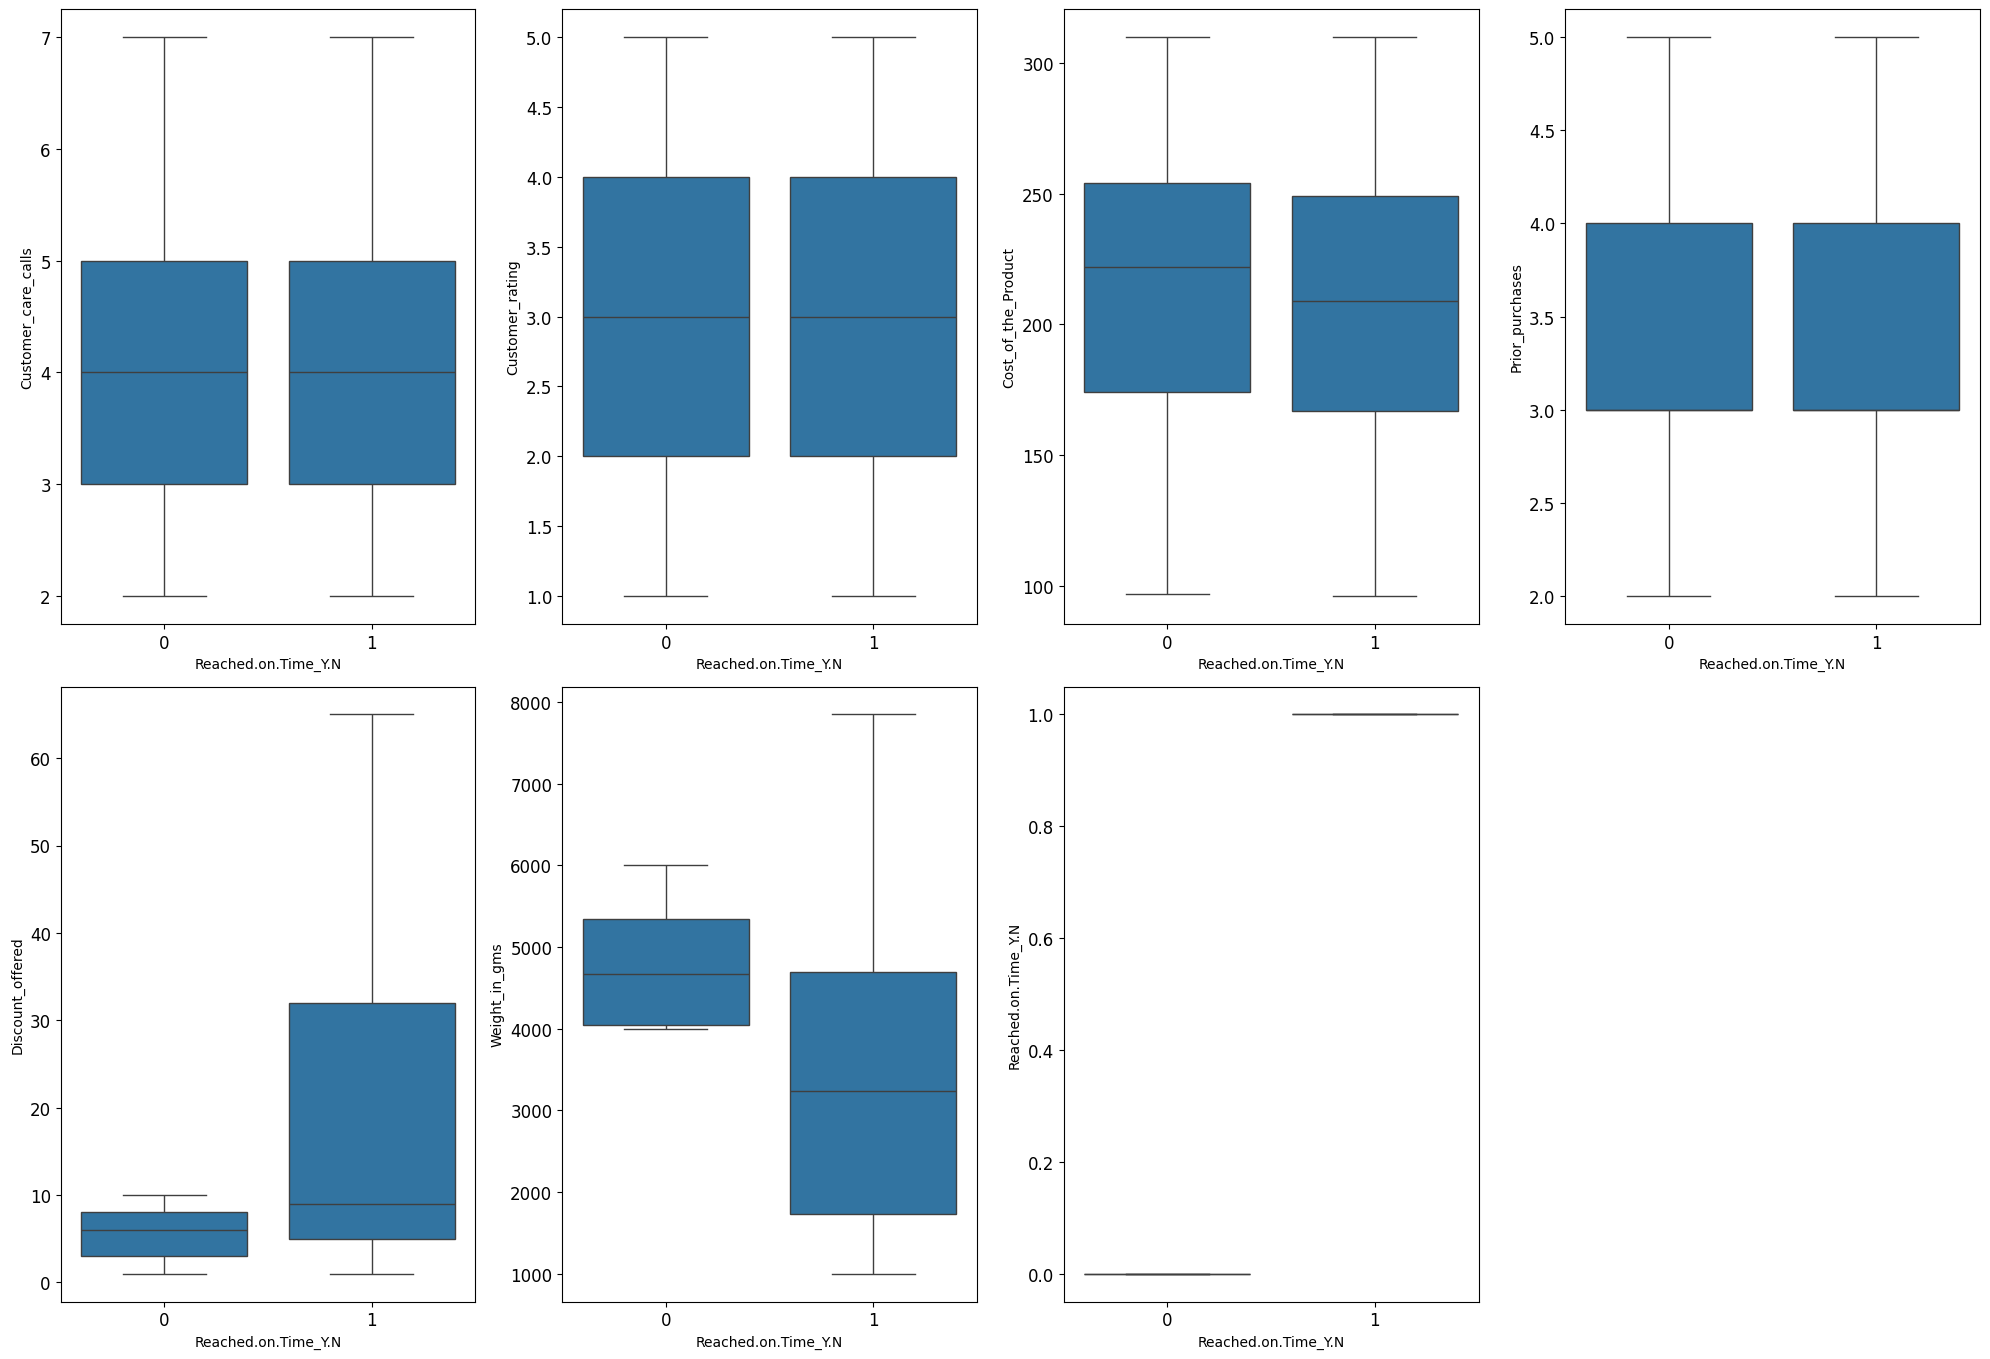

In [14]:
#Boxplot Features numerical terhadap Reached.on.Time_Y.N

plt.figure(figsize = (20,20))
for i in range(0, len(num)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[num[i]], x= 'Reached.on.Time_Y.N', data = df, showfliers = False)
    plt.tight_layout()

Dari plot *boxplot* diatas, dapat disimpulkan bahwa:
- *Feature* `Cost_of_the_product`, `Discount_offered`, dan `Weight_in_gms` memiliki sebaran cukup berbeda terhadap target `Reached.on.Time_Y.N`, sehingga akan dianalisis lebih lanjut pada ketiga feature terkait.
- Feature `Customer_care_calls`, `Customer_rating`, dan `Prior_purchases` sebarannya hampir sama terhadap target `Reached.on.Time_Y.N`, sehingga EDA tidak berfokus pada ketiga feature ini.

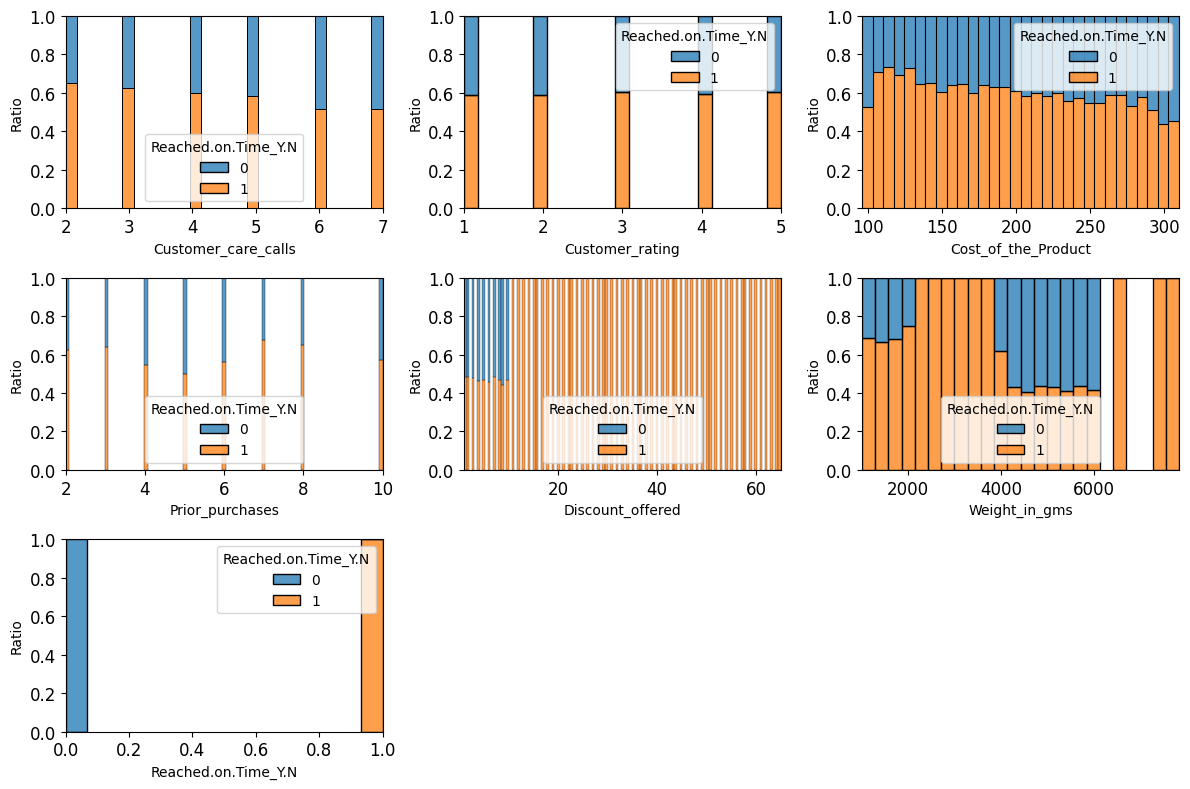

In [15]:
# distribusi feature numerical terhadap target secara proporsional

plt.figure(figsize = (12,8))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=df[num[i]], hue= 'Reached.on.Time_Y.N', data = df, multiple = 'fill')
    plt.ylabel('Ratio')
    plt.tight_layout()

- Semua pengiriman barang dengan diskon >10% tidak tepat waktu.
- Pengiriman barang dengan berat di antara 2000 - 4000 g dan di atas 6000 g tidak tepat waktu.
- Harga barang (Cost_of_the_Product) yang semakin tinggi cenderung membuat pengiriman barang tepat waktu.

### b. Categoricals

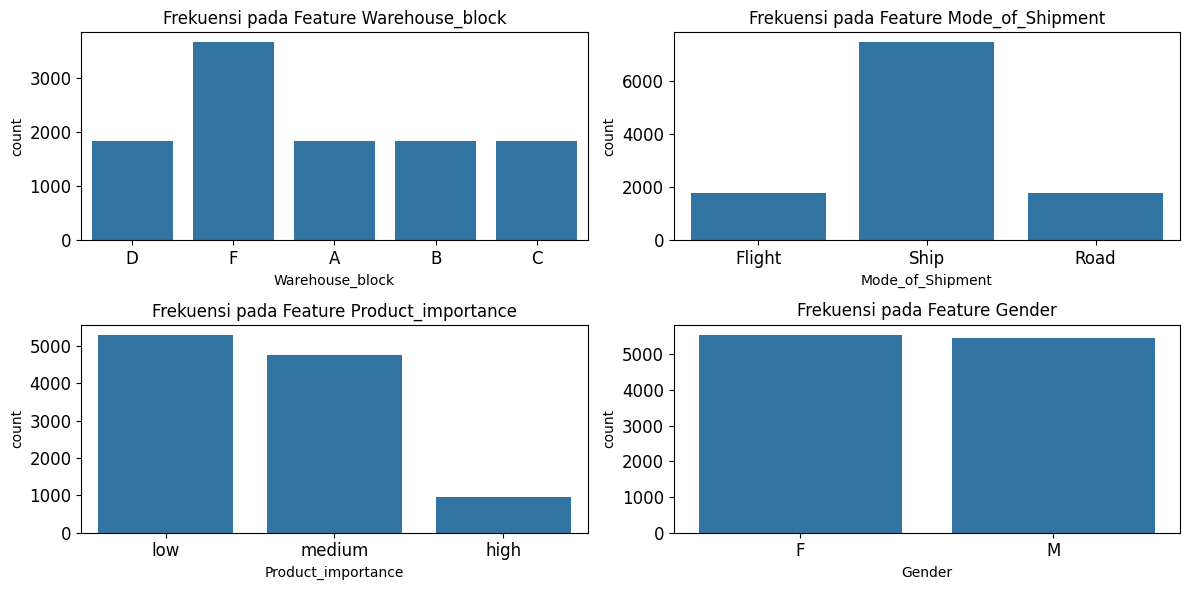

In [16]:
# Distriusi feature kategorikal

plt.figure(figsize = (12,6))
for i in range(0, len(cat)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat[i]])
    plt.title(f'Frekuensi pada Feature {cat[i]}')
    plt.tight_layout()

- Terdapat nilai feature yang mendominasi pada feature `Warehouse_block` (F), `Mode_of_Shipment` (Ship), dan `Product_importance` (low).
- Nilai feature `Gender` terlihat merata dengan proporsi sekitar 50:50.
- Perbandingan nilai dalam feature tidak terlalu timpang, sehingga keempat fitur masih akan digunakan dalam Exploratory Data Analysis.

In [25]:
# Ontime Warehouse Block
sum_reached_on_time = df.groupby("Warehouse_block")["Reached.on.Time_Y.N"].value_counts().unstack(fill_value=0).reset_index()

fig = px.bar(sum_reached_on_time, x=[0, 1], y="Warehouse_block", title="Reached on Time Status by Warehouse block",
             labels={"value": "Count", "Warehouse_block": "Warehouse Block", "Reached.on.Time_Y.N": "Reached on Time"},
             orientation='h')
fig.update_layout(barmode='stack')
fig.show()


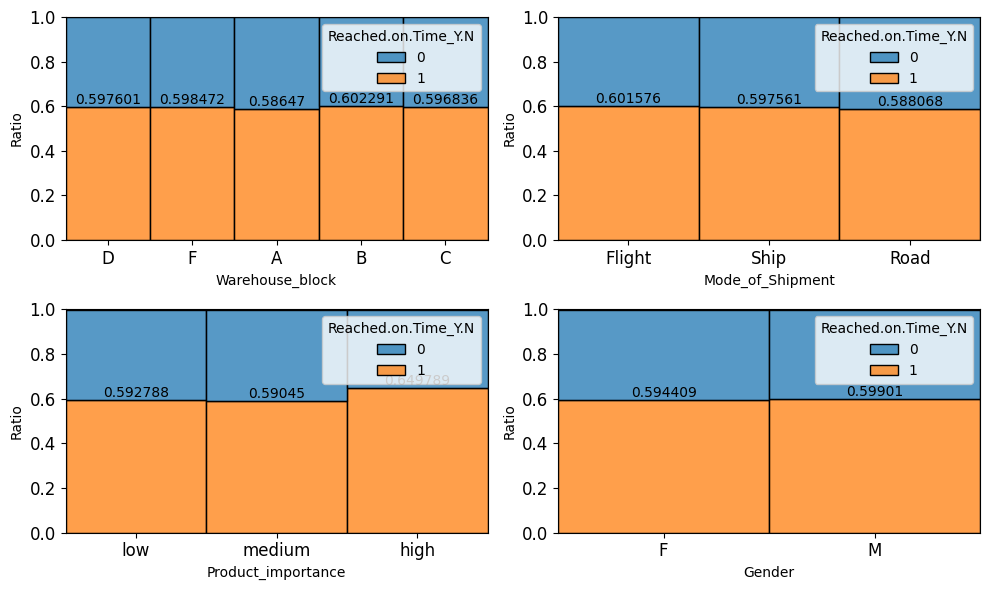

In [18]:
# Distribusi feature kategorikal terhdapp feature target (proporsional)

plt.figure(figsize = (10,6))
for i in range(0, len(cat)):
    fig = plt.subplot(2, 2, i+1)
    sns.histplot(x=df[cat[i]], hue= 'Reached.on.Time_Y.N', data = df, multiple = 'fill')
    plt.bar_label(fig.containers[0])
    plt.ylabel('Ratio')
    plt.tight_layout()

- Barang yang terkirim tepat waktu terbanyak terdapat di warehouse block A. Sedangkan pada block B, paling banyak barang yang tidak terkirim tepat waktu.
- Road menjadi metode pengiriman yang paling banyak yang berhasil mengirimkan barang tepat waktu, sedangkan Flight merupakan metode paling banyak yang tidak berhasil mengirim barang tepat waktu.
- Product_importance yang tergolong medium memiliki jumlah barang paling banyak yang berhasil terkirim tepat waktu, sedangkan produk yang tergolong high, paling banyak gagal dalam mengirimkan barang tepat waktu.
- Rasio barang yang terkirim tepat waktu dengan yang tidak tepat waktu pada feature Gender cenderung sama.

**Follow up untuk data pre processing:**
- Lakukan outlier handling pada feature `Prior_purchases` dan `Discount_offered`.
- Akan dilakukan transformasi log untuk variable bersifat right skewed (Prior_purchases dan Discount_offered). Transformasi log dilakukan untuk meminimalisir penghilangan data yang dikategorikan sebagai outlier.
- Feature `Weight_in_gms` dan `Cost_of_the_Product` bersifat left skewed, sehingga akan dilakukan juga transformasi feature dengan menggunakan standarisasi.
- Melakukan pengelompokkan (grouping) pada feature `Weight_in_gms`/ `Discount_offered`/ `Cost_of_the_Product`.
- `Customer_care_calls` dan `Customer_rating` tidak dilakukan transformasi karena sudah mendekati sebaran distribusi normal.
- Akan dilakukan feature encoding pada feature categorical, untuk mengubah nilai feature menjadi numerical.
- Semua feature akan dilakukan normalisasi scaling sehingga skala antar feature sama.
- Tidak perlu dilakukan handling class imbalance, karena jumlah nilai pada target tidak mengalami ketimpangan (60:40).

## **3. Multivariate Analysis**

#### Heatmap Plot

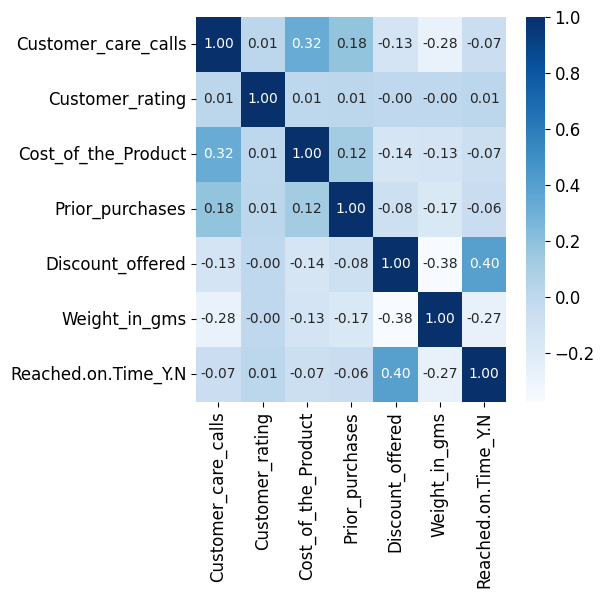

In [19]:
# melihat korelasi dengan heatmap plot

plt.figure(figsize=(5, 5))
sns.heatmap(df[num].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

- Feature `Discount_offered` berkorelasi positif lemah terhadap target (0.40), sehingga semakin tinggi diskon, semakin tinggi pula kecenderungan untuk barang tidak sampai tepat waktu.
- Feature `Weight_in_gms` (berat barang) berkorelasi negatif lemah terhadap target (-0.27), sehingga semakin berat barang, semakin tinggi kecenderungan barang untuk terkirim tepat waktu.
- Terdapat korelasi positif lemah antara `Customer_care_calls` dengan `Cost_of_the_Product` (0.32). Semakin tinggi harga barang, semakin tinggi pula jumlah customer care calls yang diterima.
- Terdapat korelasi negatif lemah antara `Weight_in_gms` dengan `Discount_offered` (-0.38). Semakin tinggi berat barang, semakin kecil nilai diskon yang diberikan.
- Feature lainnya tidak memiliki korelasi secara linier baik dengan antar fitur dan dengan target.

#### Pair plot

<Figure size 700x700 with 0 Axes>

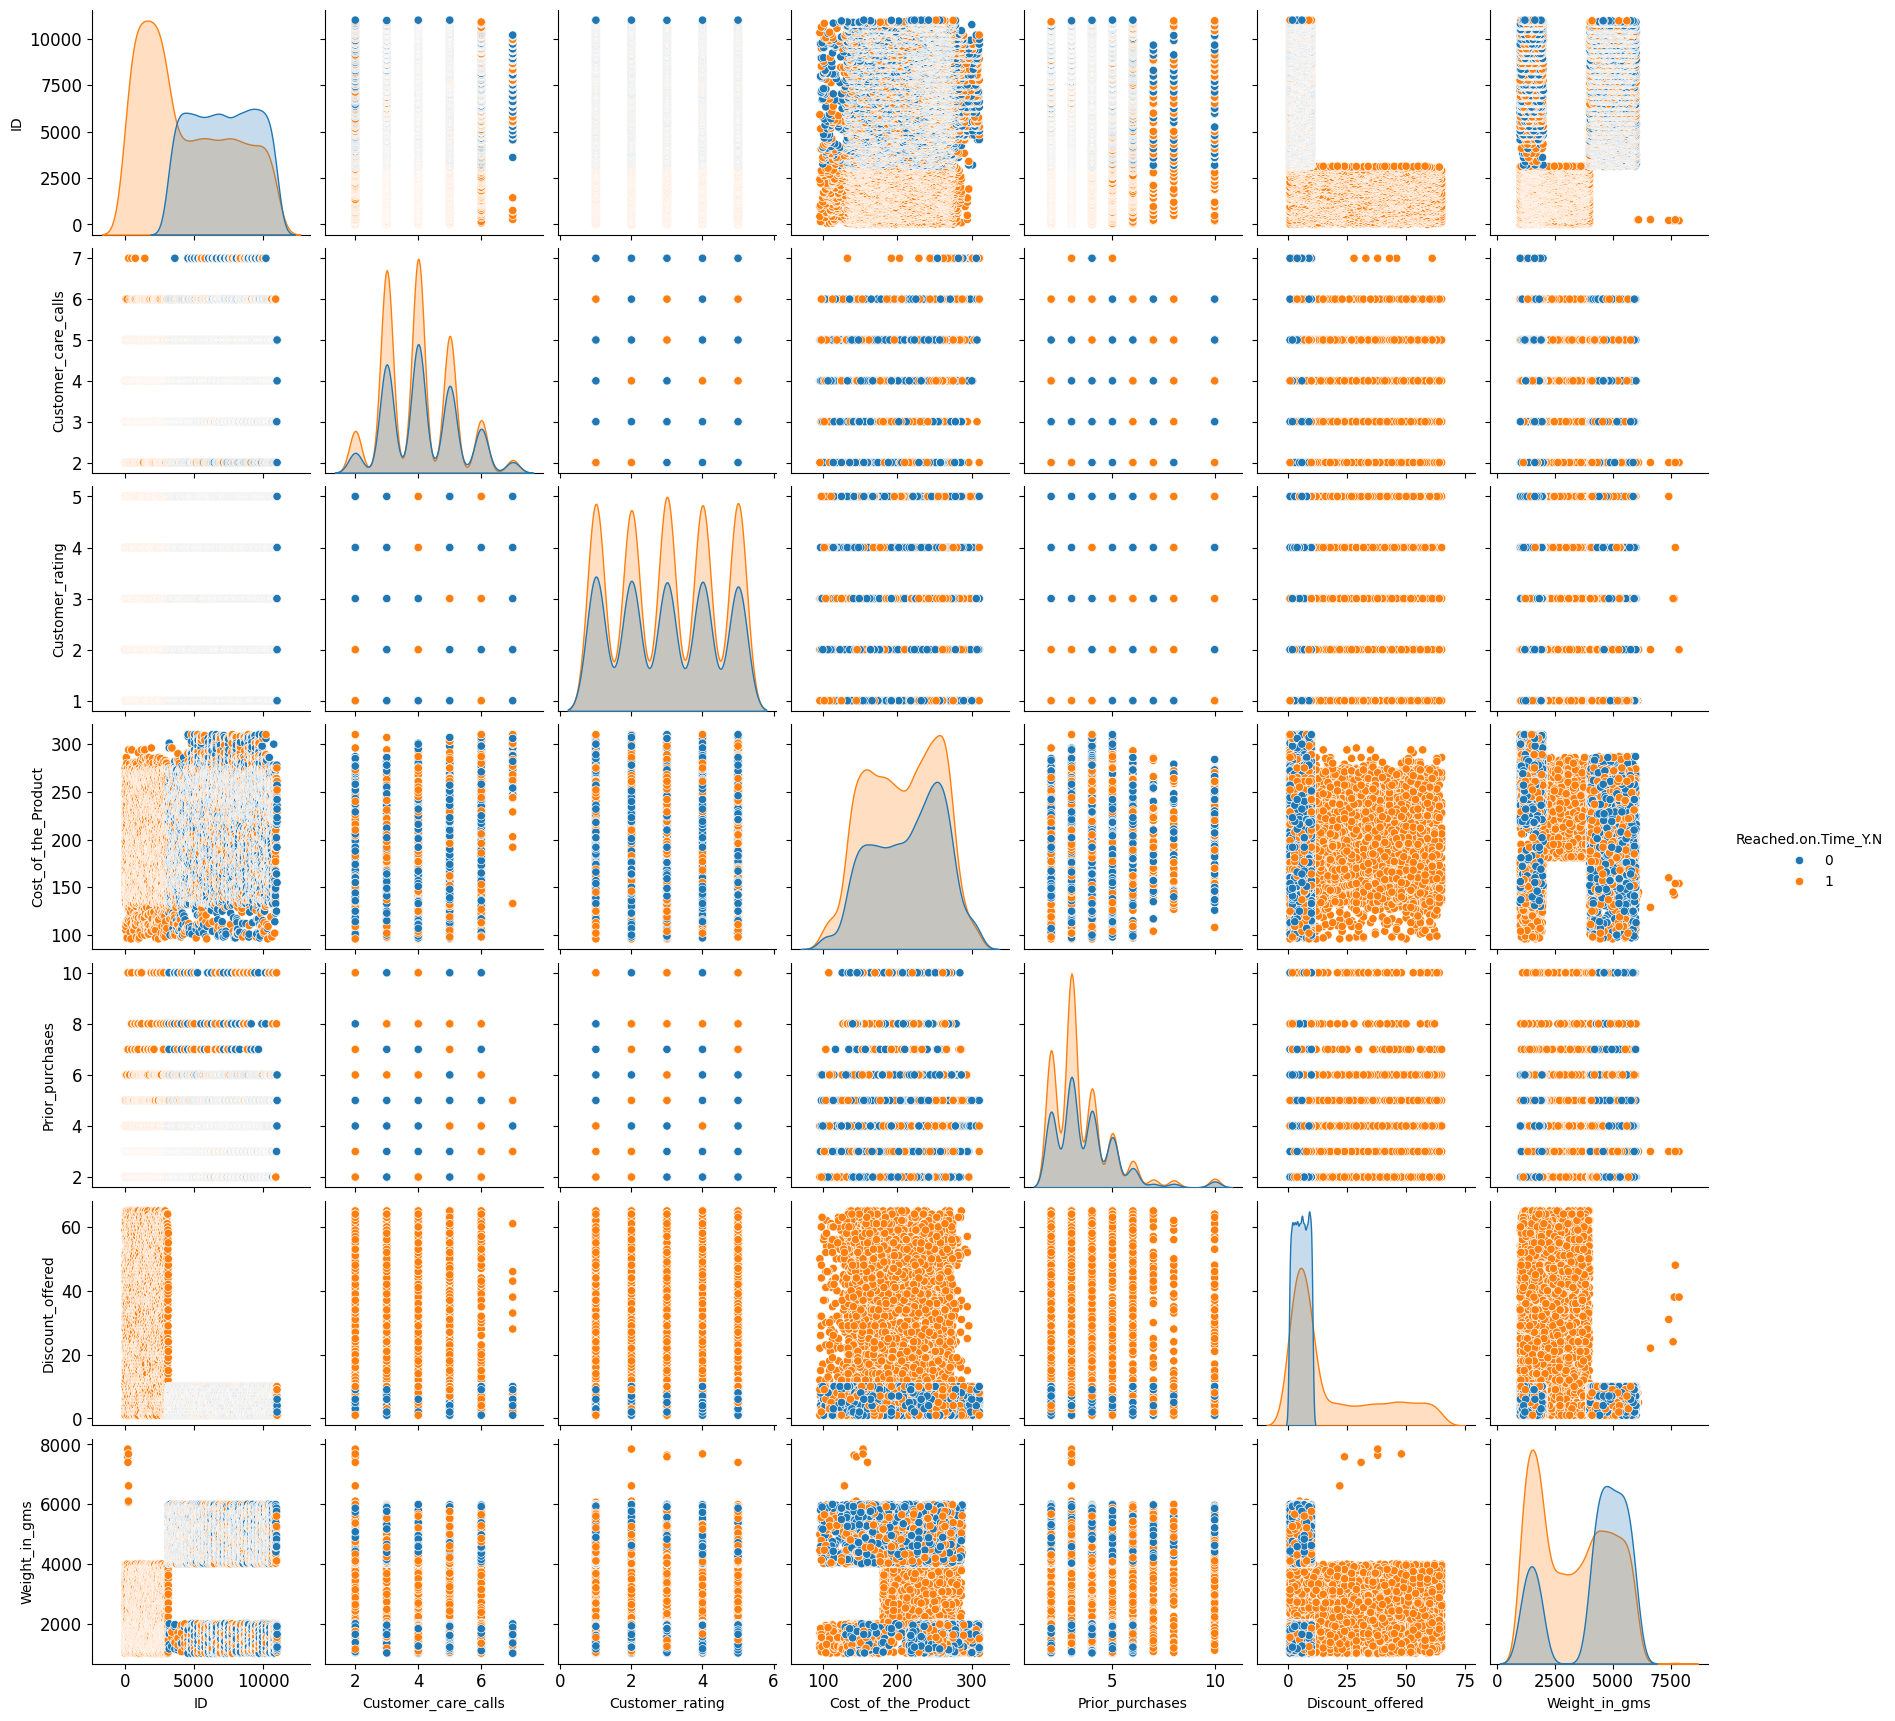

In [20]:
# melihat korelasi dengan pair plot

plt.figure(figsize=(7, 7))
sns.pairplot(df, diag_kind='kde', hue = 'Reached.on.Time_Y.N')

- Dari pairplot, didapatkan beberapa hubungan yang menarik (yang cukup terpisah berdasarkan variable targetnya) yaitu pada `Discount_offered`, `Cost_of_the_Product`, dan `Weight_in_gms`. Ketiga fitur ini memiliki nilai yang cukup terpisah dengan target, sehingga sangat relevan untuk dipertahankan sebagai fitur pada saat modelling.
- Semua barang di antara 2000 hingga 4000 gram dan harga barang yang berada di antara 175 hingga 300 tidak terkirim tepat waktu.
- Barang dengan berat di bawah 2000 gram dan harga barang sekitar 100 - 125, tidak terkirim tepat waktu.
- Semua barang yang mendapatkan diskon >10% tidak terkirim tepat waktu, berapapun berat dan harga barangnya.
- Semua barang dengan berat di atas 6000 gram tidak terkirim tepat waktu.

## **4. Business Insight**

##### 1. Keterlambatan pengiriman berdasarkan discount

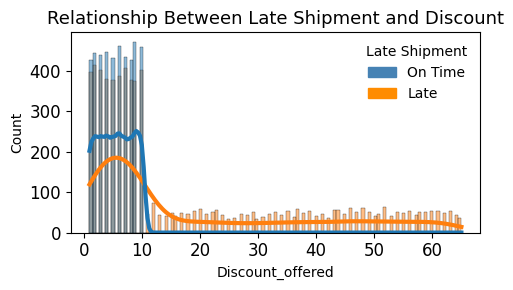

In [21]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='Discount_offered', hue='Reached.on.Time_Y.N', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Discount', fontsize=13)
plt.tight_layout()

Insight: <br>
Pemberian discount memiliki pengaruh terhadap ketepatan waktu pengiriman. Pembelian produk dengan discount > 10% mengalami keterlambatan waktu pengiriman. <br>
<br>
Rekomendasi: <br>
Untuk menjaga kepuasan pelanggan, pihak e-commerce dapat memberikan warning atau notifikasi kepada pelanggan yang menggunakan discount tinggi kemungkinan akan terjadi keterlambatan pengiriman.

##### 2. Keterlambatan Pengiriman berdasarkan Berat Produk

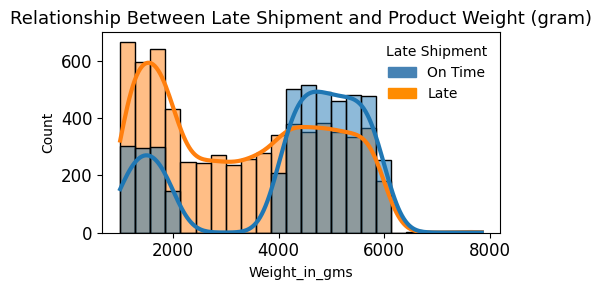

In [22]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='Weight_in_gms', hue='Reached.on.Time_Y.N', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Product Weight (gram)', fontsize=13)
plt.tight_layout()

Insight: <br>
Berat paket memiliki pengaruh terhadap keterlambatan pengiriman. Paket dengan berat 2 - 4kg dan > 6kg mengalami keterlambatan pengiriman. <br>
<br>
Rekomendasi:<br>
Pihak e-commerce memberikan notifikasi kepada pelanggan dengan berat paket 2-4kg atau >6kg bahwa kemungkinan akan terjadi keterlambatan pengiriman.